In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

## To Find null value


In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer


In [9]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')


In [10]:
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))


In [11]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')


In [12]:
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))


In [13]:
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))


In [14]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## label Encoding


In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le=LabelEncoder()


In [17]:
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [18]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,47,2
1,1,1,0,190,0,52,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,47,2
3,3,1,0,272,0,48,1,0,49,189,55,2
4,4,0,2,15,1,48,0,0,472,43,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,47,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,39,1,2,675,131,47,2
889,889,1,0,81,1,34,0,0,8,153,60,0


## To remove outliers


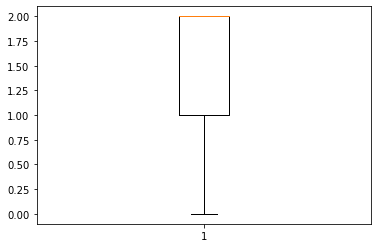

In [19]:
plt.boxplot(df['Pclass'])
plt.show()

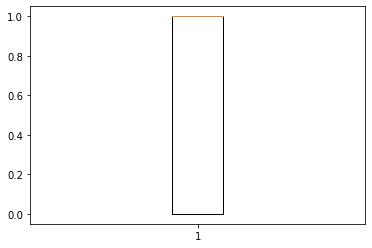

In [20]:
plt.boxplot(df['Sex'])
plt.show()

PassengerId       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Survived       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Pclass         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Name           AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.168478x0.222059)
Age            AxesSubplot(0.327174,0.391471;0.168478x0.222059)
SibSp          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Parch          AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Ticket               AxesSubplot(0.125,0.125;0.168478x0.222059)
Fare              AxesSubplot(0.327174,0.125;0.168478x0.222059)
Cabin             AxesSubplot(0.529348,0.125;0.168478x0.222059)
Embarked          AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

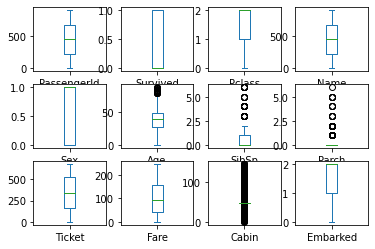

In [21]:
df.plot(kind='box',subplots=True,layout=(3,4))


In [36]:
import scipy.stats as stats


In [37]:
stats.zscore(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,-0.789272,0.827377,-1.310217,0.737695,-0.673387,0.490044,-0.473674,0.918966,-1.247170,-0.281881,0.585954
1,-1.726220,1.266990,-1.566107,-0.991410,-1.355574,0.763709,0.490044,-0.473674,1.282625,1.451165,1.161545,-1.942303
2,-1.722332,1.266990,0.827377,-0.357685,-1.355574,-0.314113,-0.504555,-0.473674,1.646283,-0.918801,-0.281881,0.585954
3,-1.718444,1.266990,-1.566107,-0.672604,-1.355574,0.524193,0.490044,-0.473674,-1.442322,1.194181,0.057748,0.585954
4,-1.714556,-0.789272,0.827377,-1.671790,0.737695,0.524193,-0.504555,-0.473674,0.664904,-0.890248,-0.281881,0.585954
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.400452,0.737695,-0.254234,-0.504555,-0.473674,-1.183277,-0.290618,-0.281881,0.585954
887,1.718444,1.266990,-1.566107,-0.552079,-1.355574,-0.912903,-0.504555,-0.473674,-1.616678,0.680212,-1.003594,0.585954
888,1.722332,-0.789272,0.827377,-0.124412,-1.355574,-0.014718,0.490044,2.008933,1.676173,0.366120,-0.281881,0.585954
889,1.726220,1.266990,-1.566107,-1.415189,0.737695,-0.314113,-0.504555,-0.473674,-1.646568,0.680212,0.270017,-1.942303


In [38]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  50,  59,  66,  68,  71,  75,  86, 119,
       128, 148, 159, 164, 167, 171, 180, 182, 183, 193, 201, 205, 233,
       251, 261, 262, 266, 278, 309, 324, 337, 339, 340, 345, 360, 370,
       386, 394, 434, 437, 438, 456, 462, 480, 516, 541, 542, 558, 567,
       577, 585, 610, 618, 638, 662, 678, 683, 686, 699, 715, 724, 736,
       772, 774, 776, 787, 792, 809, 813, 824, 835, 846, 850, 858, 863,
       885], dtype=int64), array([10, 10,  7,  6,  7,  6,  6, 10,  6,  6, 10,  7,  6, 10, 10,  6,  6,
        7,  6,  6,  6, 10, 10,  6, 10,  6, 10,  6, 10,  6,  6, 10,  6, 10,
       10, 10, 10,  7, 10,  6, 10, 10,  7,  7, 10, 10,  6, 10,  6,  6, 10,
        7, 10, 10,  7, 10,  7, 10,  7,  6,  6, 10, 10, 10,  7, 10,  7, 10,
        6,  6, 10,  6,  6, 10,  6,  6,  7,  6,  7], dtype=int64))


In [39]:
df_new=df[(z<3).all(axis=1)]

In [40]:
df_new.shape,df.shape

((812, 12), (891, 12))

In [41]:
df=df_new

## TO check the skewness


In [42]:
df.skew()


PassengerId   -0.012730
Survived       0.455503
Pclass        -0.602942
Name           0.034084
Sex           -0.677236
Age            0.459106
SibSp          2.071450
Parch          2.113648
Ticket         0.007257
Fare           0.507306
Cabin          2.008388
Embarked      -1.191384
dtype: float64

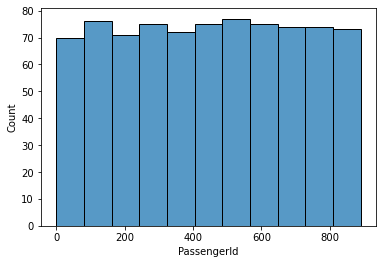

In [44]:
sns.histplot(df['PassengerId'])
plt.show()


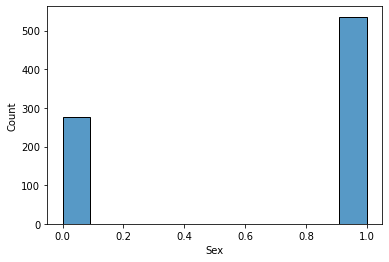

In [45]:
sns.histplot(df['Sex'])
plt.show()

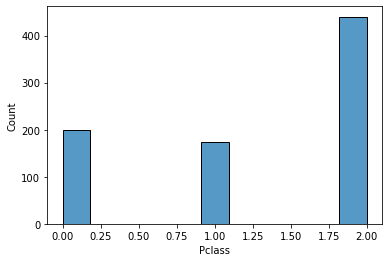

In [46]:
sns.histplot(df['Pclass'])
plt.show()

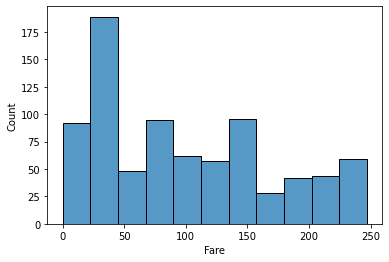

In [47]:
sns.histplot(df['Fare'])
plt.show()

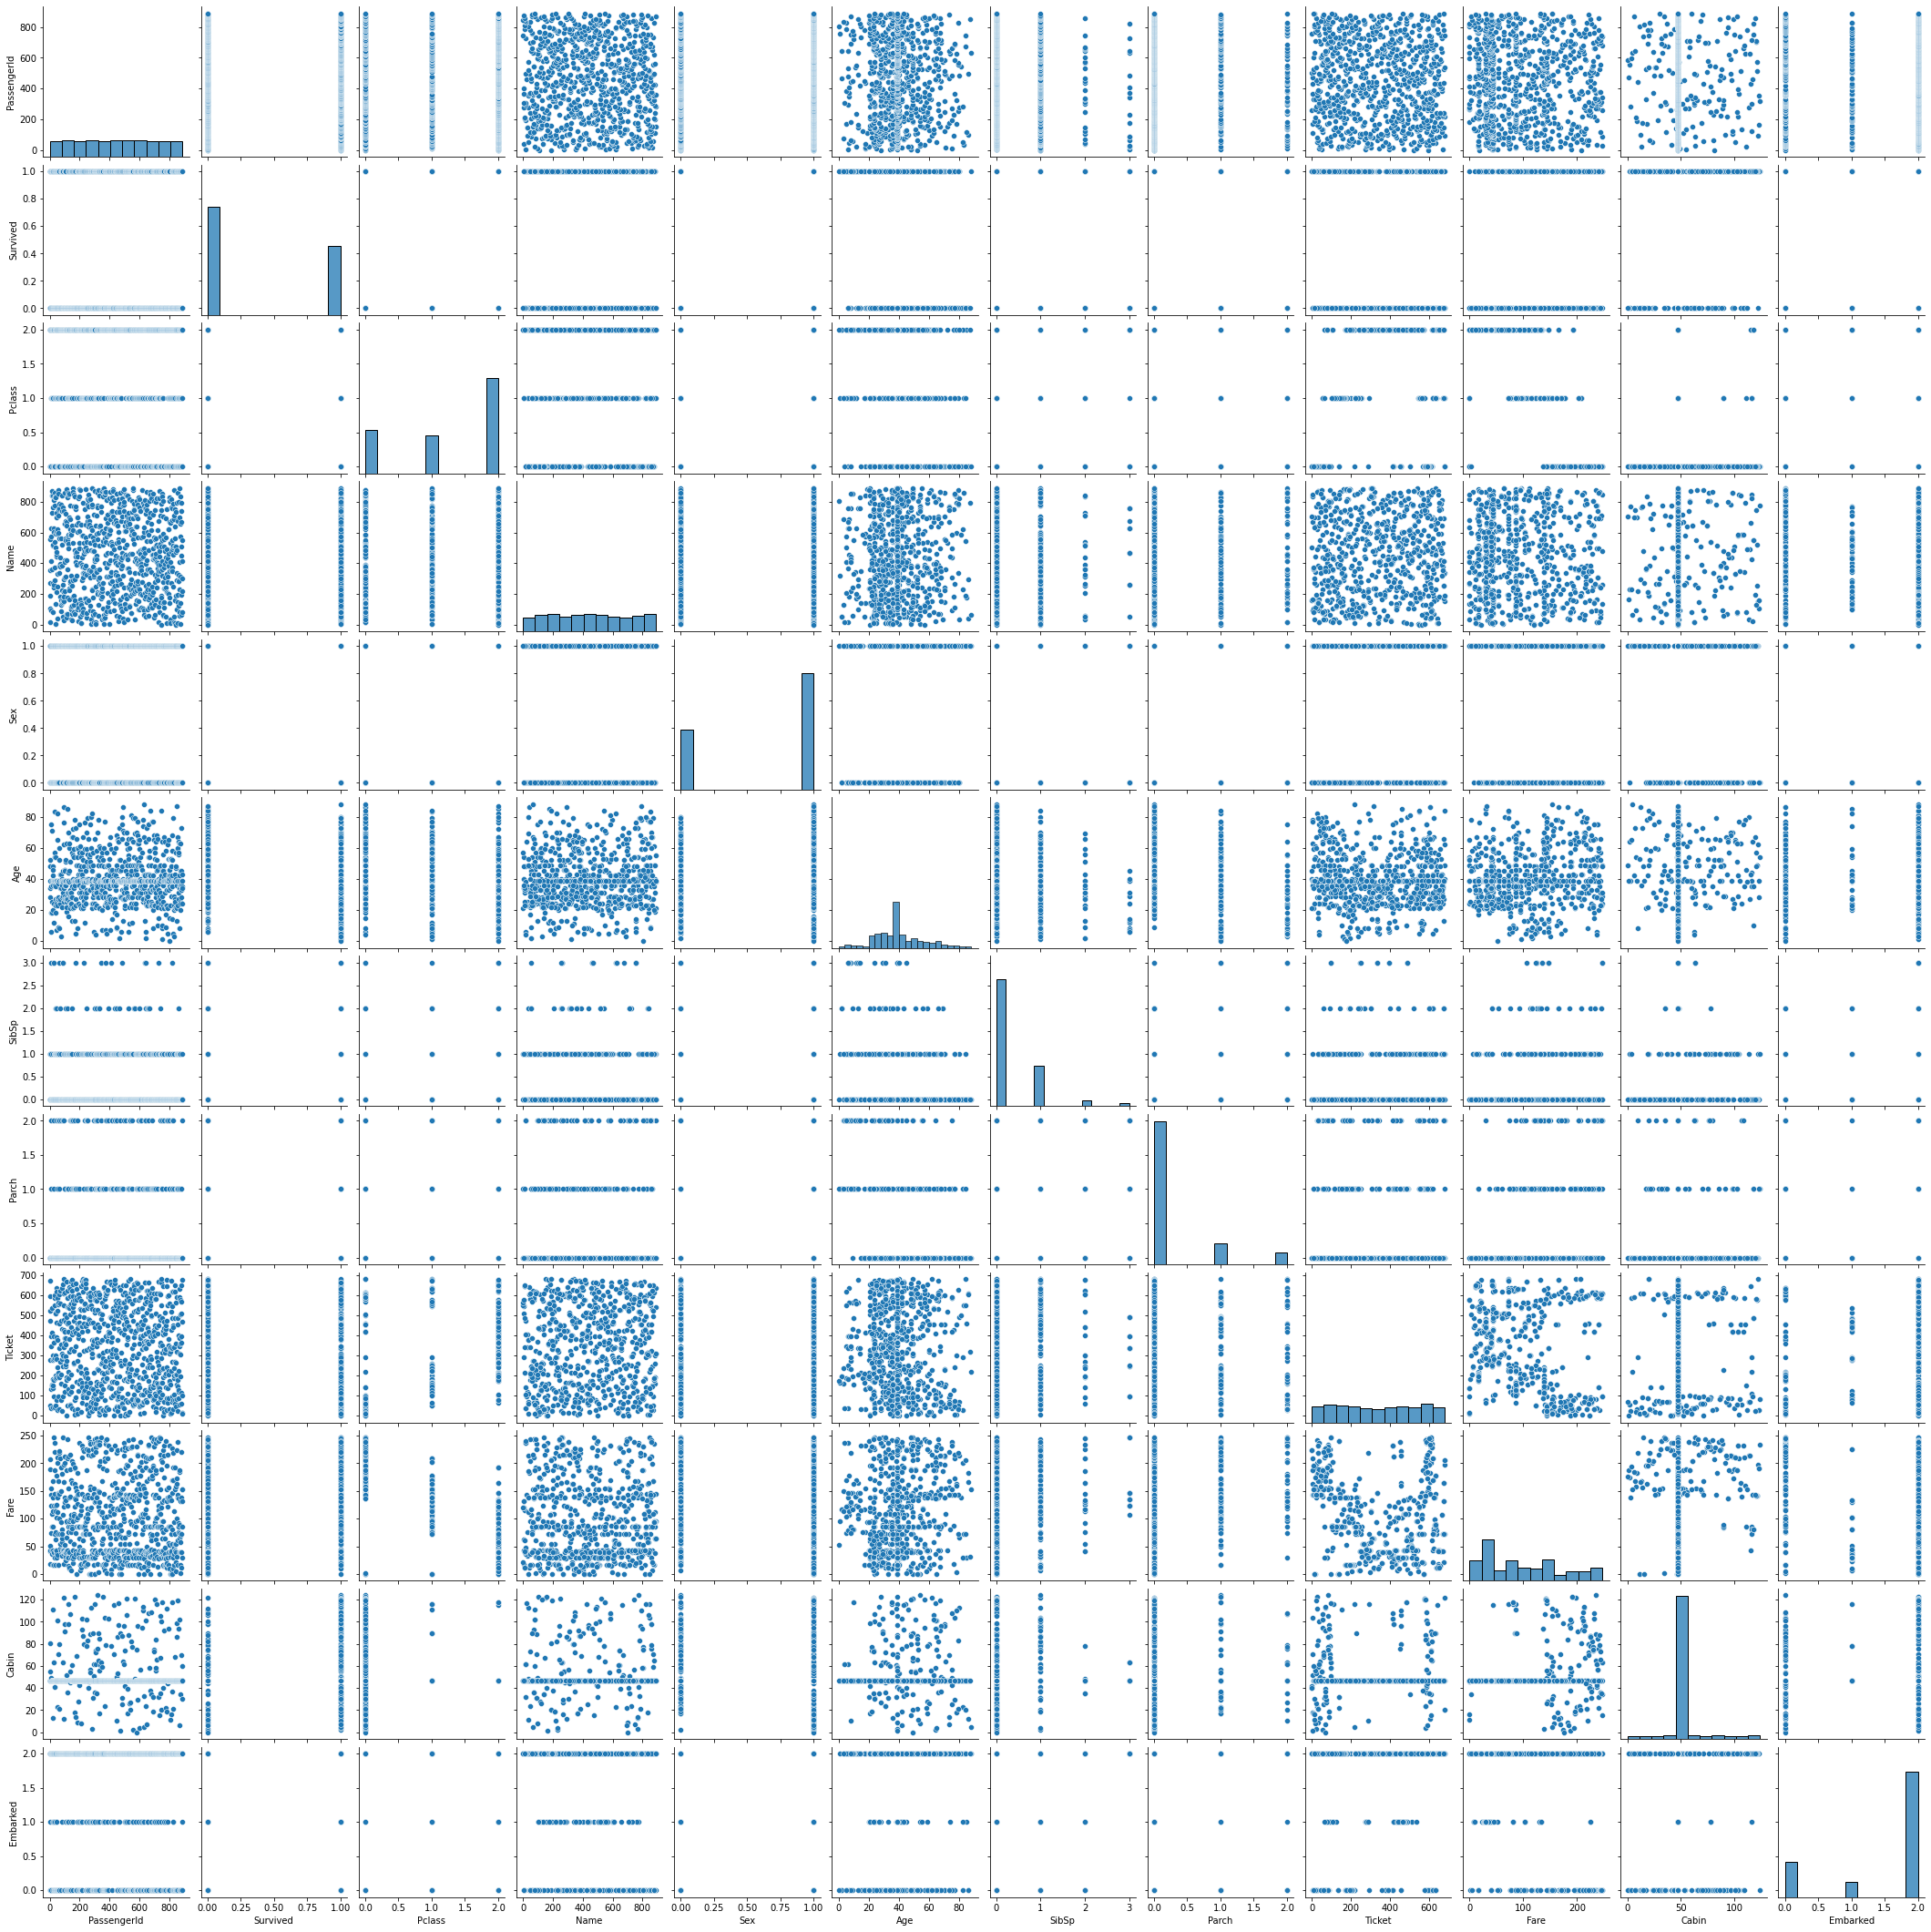

In [48]:
sns.pairplot(df)
plt.show()

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,47,2
1,1,1,0,190,0,52,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,47,2
3,3,1,0,272,0,48,1,0,49,189,55,2
4,4,0,2,15,1,48,0,0,472,43,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,47,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,39,1,2,675,131,47,2
889,889,1,0,81,1,34,0,0,8,153,60,0


In [50]:
from sklearn.preprocessing import PowerTransformer


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
features=['Age','Fare']

In [53]:
pt=PowerTransformer(method='yeo-johnson')

In [54]:
df[features]=pt.fit_transform(df[features].values)

In [55]:
df.skew()

PassengerId   -0.012730
Survived       0.455503
Pclass        -0.602942
Name           0.034084
Sex           -0.677236
Age            0.055281
SibSp          2.071450
Parch          2.113648
Ticket         0.007257
Fare          -0.129101
Cabin          2.008388
Embarked      -1.191384
dtype: float64

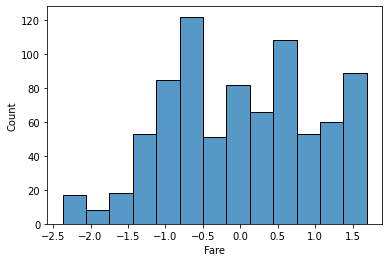

In [56]:
sns.histplot(df["Fare"])
plt.show()

## To check the correlation

In [57]:
corr=df.corr()


In [58]:
corr


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.002499,-0.027388,-0.038875,0.064350,0.004746,-0.066102,0.008083,-0.065818,-0.015779,-0.001657,0.023015
Survived,-0.002499,1.000000,-0.331724,-0.042842,-0.563070,-0.078560,0.085013,0.199179,-0.152149,0.369037,0.181081,-0.157671
Pclass,-0.027388,-0.331724,1.000000,0.050688,0.152133,-0.302511,-0.063001,-0.118864,0.295487,-0.720150,-0.241792,0.159542
Name,-0.038875,-0.042842,0.050688,1.000000,0.009909,0.053069,-0.058744,-0.037216,0.042100,-0.034174,0.017363,-0.009406
Sex,0.064350,-0.563070,0.152133,0.009909,1.000000,0.105070,-0.209692,-0.251861,0.076458,-0.286401,-0.091222,0.118583
Age,0.004746,-0.078560,-0.302511,0.053069,0.105070,1.000000,-0.154436,-0.262295,-0.054563,0.114753,0.081251,-0.012940
SibSp,-0.066102,0.085013,-0.063001,-0.058744,-0.209692,-0.154436,1.000000,0.344691,-0.000842,0.371122,0.045856,-0.006822
Parch,0.008083,0.199179,-0.118864,-0.037216,-0.251861,-0.262295,0.344691,1.000000,-0.025671,0.356921,0.032114,-0.036866
Ticket,-0.065818,-0.152149,0.295487,0.042100,0.076458,-0.054563,-0.000842,-0.025671,1.000000,-0.166484,-0.008109,0.000202
Fare,-0.015779,0.369037,-0.720150,-0.034174,-0.286401,0.114753,0.371122,0.356921,-0.166484,1.000000,0.209027,-0.147999


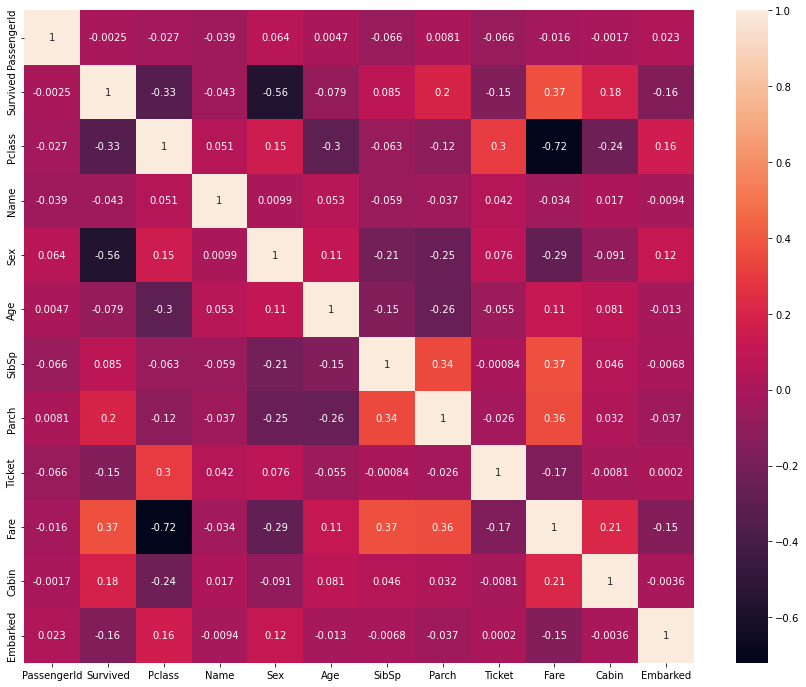

In [60]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)
plt.show()

In [61]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [62]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['vif factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [64]:
calc_vif(x)

,variables,vif factor
0,PassengerId,3.634367
1,Pclass,7.935220
2,Name,3.743505
3,Sex,3.151504
4,Age,1.239762
5,SibSp,1.769471
6,Parch,1.625836
7,Ticket,4.151025
8,Fare,2.771149
9,Cabin,6.638063


In [65]:
x.drop('Name',axis=1,inplace=True)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


In [68]:
x_train.shape,x_test.shape


((649, 10), (163, 10))

In [69]:
df['Survived'].value_counts()


0    496
1    316
Name: Survived, dtype: int64

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression


In [71]:
lr=LogisticRegression()


In [72]:
lr.fit(x_train,y_train)


LogisticRegression()

In [73]:
pred=lr.predict(x_test)


In [74]:
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.8159509202453987
confusion_matrix [[88 12]
 [18 45]]
classification_report               precision    recall  f1-score   support

           0       0.83      0.88      0.85       100
           1       0.79      0.71      0.75        63

    accuracy                           0.82       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.81      0.82      0.81       163



In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
score=cross_val_score(lr,x,y,cv=10)


In [77]:
print(score)
print(score.mean())
print(score.std())

[0.73170732 0.76829268 0.81481481 0.83950617 0.80246914 0.75308642
 0.80246914 0.7654321  0.85185185 0.83950617]
0.7969135802469135
0.03874476785616688


## Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier


In [79]:
dtc=DecisionTreeClassifier()


In [80]:
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [81]:
pred=dtc.predict(x_test)


In [82]:
print('accuracy_score',accuracy_score(pred,y_test))
print('confusion_matrix',confusion_matrix(pred,y_test))
print('classification_report',classification_report(pred,y_test))

accuracy_score 0.754601226993865
confusion_matrix [[75 15]
 [25 48]]
classification_report               precision    recall  f1-score   support

           0       0.75      0.83      0.79        90
           1       0.76      0.66      0.71        73

    accuracy                           0.75       163
   macro avg       0.76      0.75      0.75       163
weighted avg       0.76      0.75      0.75       163



In [83]:
score=cross_val_score(dtc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.74390244 0.62195122 0.74074074 0.60493827 0.82716049 0.81481481
 0.7654321  0.75308642 0.83950617 0.82716049]
0.7538693164709425
0.07860029753893442


## Support vector classifier


In [84]:
from sklearn.svm import SVC


In [85]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [86]:
pred=svc.predict(x_test)

In [87]:
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion matrix',confusion_matrix(y_test,pred))
print('classification report',classification_report(y_test,pred))

accuracy_score 0.6380368098159509
confusion matrix [[88 12]
 [47 16]]
classification report               precision    recall  f1-score   support

           0       0.65      0.88      0.75       100
           1       0.57      0.25      0.35        63

    accuracy                           0.64       163
   macro avg       0.61      0.57      0.55       163
weighted avg       0.62      0.64      0.60       163



In [88]:
score=cross_val_score(svc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.6097561  0.59756098 0.61728395 0.66666667 0.69135802 0.7037037
 0.64197531 0.67901235 0.60493827 0.71604938]
0.6528304727491718
0.04187026517930364


## Ada Boost Classifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier


In [90]:
ad=AdaBoostClassifier()


In [91]:
ad.fit(x_train,y_train)


AdaBoostClassifier()

In [92]:
pred=ad.predict(x_test)


In [93]:
print('accuracy_scoe',accuracy_score(pred,y_test))
print('confusion_matrix',confusion_matrix(pred,y_test))
print('classification_report',classification_report(y_test,pred))

accuracy_scoe 0.803680981595092
confusion_matrix [[82 14]
 [18 49]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.82      0.84       100
           1       0.73      0.78      0.75        63

    accuracy                           0.80       163
   macro avg       0.79      0.80      0.80       163
weighted avg       0.81      0.80      0.80       163



In [94]:
score=cross_val_score(ad,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.3902439  0.69512195 0.79012346 0.75308642 0.83950617 0.7654321
 0.79012346 0.82716049 0.87654321 0.75308642]
0.7480427582053599
0.1287839306673713


## Random forest classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier


In [96]:
rf=RandomForestClassifier()


In [97]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [98]:
pred=rf.predict(x_test)


In [99]:
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.8098159509202454
confusion_matrix [[84 16]
 [15 48]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.75      0.76      0.76        63

    accuracy                           0.81       163
   macro avg       0.80      0.80      0.80       163
weighted avg       0.81      0.81      0.81       163



In [100]:
score=cross_val_score(rf,x,y,cv=100)
print(score)
print(score.mean())
print(score.std())

[0.88888889 0.66666667 0.77777778 0.77777778 0.88888889 0.88888889
 0.77777778 0.88888889 0.77777778 0.77777778 0.66666667 0.66666667
 0.875      0.875      0.75       0.75       0.75       0.75
 0.875      0.625      0.75       1.         0.875      0.875
 0.875      1.         0.625      0.75       0.625      0.75
 0.75       0.875      0.875      0.75       0.75       0.875
 1.         1.         1.         0.875      1.         0.875
 0.625      1.         0.875      1.         0.875      1.
 0.875      0.875      0.625      1.         1.         0.875
 0.875      0.5        0.75       1.         1.         1.
 0.875      0.875      0.625      0.625      0.875      0.75
 0.875      0.875      0.875      1.         0.875      0.875
 0.875      0.875      0.875      0.625      0.75       0.625
 0.875      0.875      0.875      0.875      0.75       1.
 0.875      0.75       0.875      0.875      1.         0.875
 0.875      1.         0.625      0.875      0.875      0.625
 0.875    

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
model=RandomForestClassifier()


In [103]:
parameter={'criterion':['gini','entropy'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}


In [104]:
grid=GridSearchCV(estimator=model,param_grid=parameter,cv=5)


In [105]:
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [106]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]})
0.8366607036374478
gini
{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [107]:
import joblib

In [108]:
joblib.dump(RandomForestClassifier,'titanic_data.obj')

['titanic_data.obj']